In [24]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import v_measure_score
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [25]:
breast_cancer = datasets.load_breast_cancer()

In [26]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [27]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(breast_cancer.data)
  wcss.append(model.inertia_)

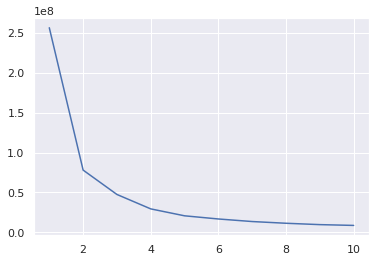

In [28]:
plt.plot(np.arange(1,11,1),wcss)

In [29]:
kmodel =  KMeans(n_clusters=2,n_init = 50,max_iter = 500,random_state = 1)
y = kmodel.fit_predict(breast_cancer.data)


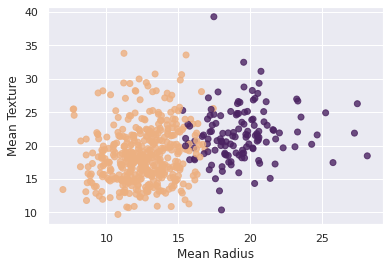

In [30]:
plt.scatter(breast_cancer.data[:,0],breast_cancer.data[:,1],  c=y, cmap = "flare",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.show()

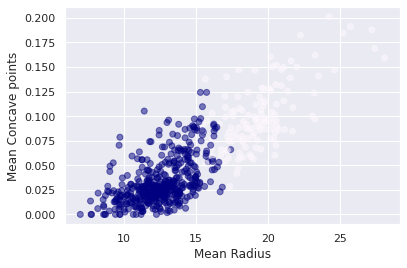

In [31]:
plt.scatter(breast_cancer.data[:,0],breast_cancer.data[:,7],  c=y, cmap = "gist_ncar",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Concave points')
plt.show()

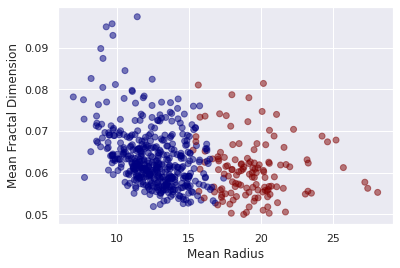

In [32]:
plt.scatter(breast_cancer.data[:,0],breast_cancer.data[:,9],  c=y, cmap = "jet",alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Fractal Dimension')
plt.show()

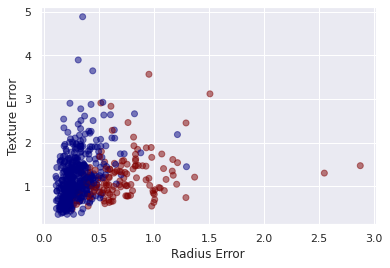

In [33]:
plt.scatter(breast_cancer.data[:,10],breast_cancer.data[:,11],  c=y, cmap = "jet",alpha=0.5)
plt.xlabel('Radius Error')
plt.ylabel('Texture Error')
plt.show()

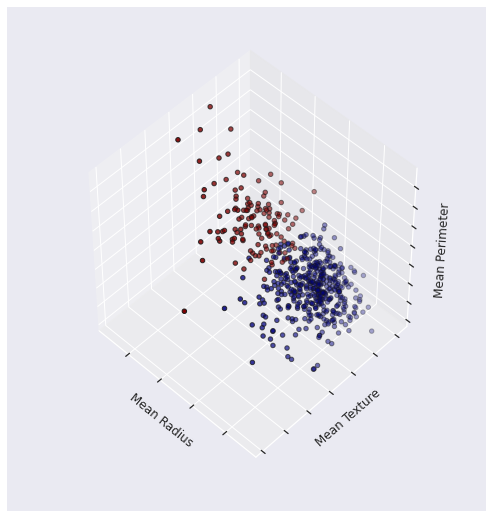

In [34]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
labels = kmodel.labels_
ax.scatter(breast_cancer.data[:, 0], breast_cancer.data[:, 1], breast_cancer.data[:, 2], c=y, cmap='jet', edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
ax.set_zlabel("Mean Perimeter")
ax.dist=12

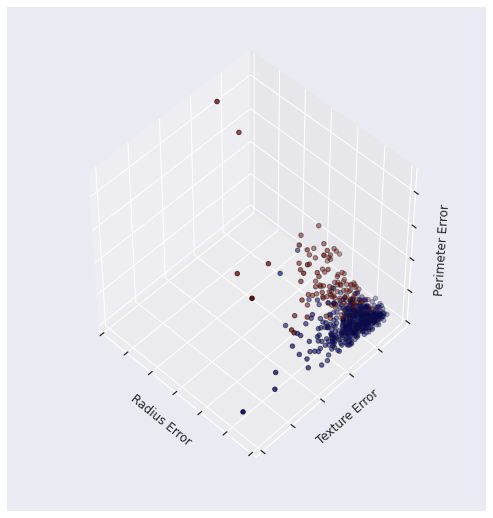

In [35]:
fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
labels = kmodel.labels_
ax.scatter(breast_cancer.data[:, 10], breast_cancer.data[:, 11], breast_cancer.data[:, 12], c=labels.astype(float), cmap='jet',edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Radius Error")
ax.set_ylabel("Texture Error")
ax.set_zlabel("Perimeter Error")
ax.dist = 12

In [36]:
from sklearn import metrics

In [37]:
estimators = [
    ("k_means_breast_cancer_2", KMeans(n_clusters=2)),
    ("k_means_breast_cancer_3", KMeans(n_clusters=3)),
    ("k_means_breast_cancer_4", KMeans(n_clusters=4)),
    ("k_means_breast_cancer_bad_init", KMeans(n_clusters=2, n_init=5,init="random")),
    ("k_means_breast_cancer_300_iterations", KMeans(n_clusters=2, n_init=1, random_state=1,max_iter = 300))
]

In [38]:
score_metrics={}
for name,est in estimators:
  est.fit(breast_cancer.data)
  labels = est.labels_
  list=[]
  list.append(est.n_iter_)
  list.append(metrics.calinski_harabasz_score(breast_cancer.data, labels))
  list.append(v_measure_score(breast_cancer.target,labels))
  list.append(adjusted_rand_score(breast_cancer.target,labels))
  list.append(metrics.silhouette_score(breast_cancer.data, labels, metric='euclidean'))
  list.append(metrics.davies_bouldin_score(breast_cancer.data, labels))
  score_metrics[name] = list

In [39]:
print(len(labels))

569


In [40]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [41]:
correct = (labels == breast_cancer.target).sum()
print(correct)

83


In [42]:
print(labels)

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

In [43]:
print(len(breast_cancer.data))

569


In [44]:
breast_cancer.data.shape

(569, 30)

In [45]:
metrics.calinski_harabasz_score(breast_cancer.data, labels)

1300.2082268895424

In [46]:
from sklearn.metrics import confusion_matrix
y_pred = kmodel.fit_predict(breast_cancer.data)
confusion_matrix(breast_cancer.target, y)

array([[ 82, 130],
       [356,   1]])

In [47]:
df = pd.DataFrame(score_metrics,index=['Number of iterations to converge','Calinski_harsbasz_score','V-measure_Score','Adjusted_Rand_Score','Silhoutee_Score','Davies_Bouldin_Score'])

In [48]:
df.T

,Number of iterations to converge,Calinski_harsbasz_score,V-measure_Score,Adjusted_Rand_Score,Silhoutee_Score,Davies_Bouldin_Score
k_means_breast_cancer_2,4.0,1300.208227,0.464793,0.491425,0.697265,0.504404
k_means_breast_cancer_3,4.0,1251.534463,0.449444,0.501563,0.675258,0.551850
k_means_breast_cancer_4,15.0,1465.672861,0.421986,0.412743,0.533461,0.617693
k_means_breast_cancer_bad_init,7.0,1300.208227,0.464793,0.491425,0.697265,0.504404
k_means_breast_cancer_300_iterations,4.0,1300.208227,0.464793,0.491425,0.697265,0.504404


In [49]:
X, y = datasets.load_breast_cancer(return_X_y=True)

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
standardized = StandardScaler()

In [52]:
standardized.fit(breast_cancer.data)
scaled_data = standardized.transform(breast_cancer.data)

In [53]:
pca = PCA(n_components=3)

In [54]:
pca.fit(scaled_data)

PCA(n_components=3)

In [55]:
x_pca = pca.transform(scaled_data)

In [56]:
scaled_data.shape

(569, 30)

In [57]:
x_pca.shape

(569, 3)

In [58]:
x_pca[:1]

array([[ 9.19283683,  1.94858309, -1.12316567]])

In [59]:
x_pca

array([[ 9.19283683,  1.94858309, -1.12316567],
       [ 2.3878018 , -3.76817173, -0.52929237],
       [ 5.73389628, -1.07517379, -0.55174749],
       ...,
       [ 1.25617928, -1.90229672,  0.56273042],
       [10.37479406,  1.6720101 , -1.87702945],
       [-5.4752433 , -0.67063678,  1.49044327]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


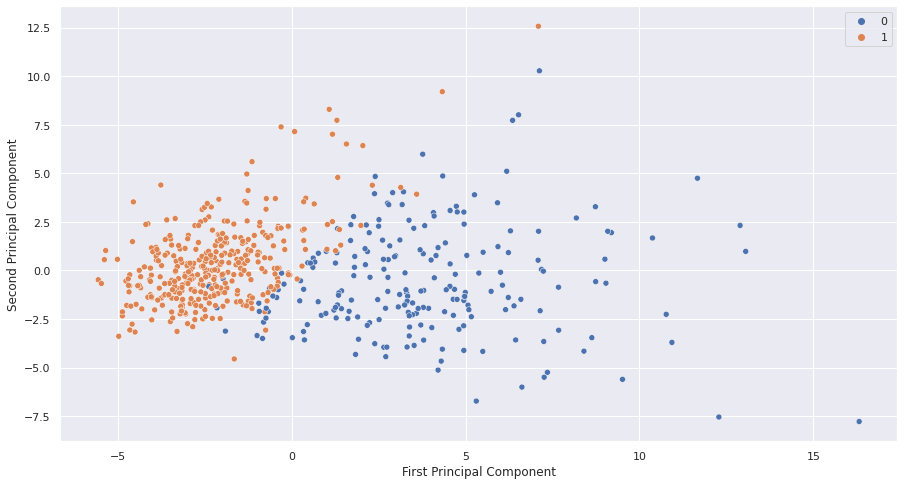

In [60]:
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x_pca[:,0], x_pca[:,1],hue=breast_cancer.target)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


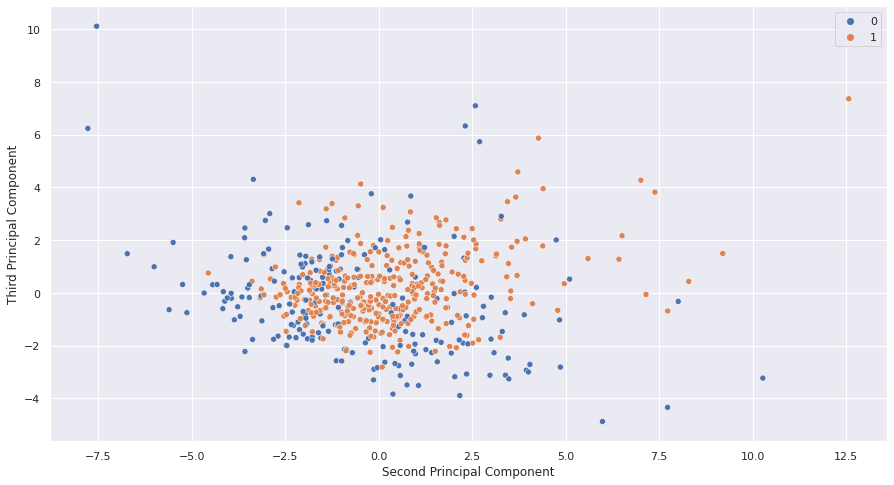

In [61]:
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x_pca[:,1], x_pca[:,2],hue=breast_cancer.target)
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


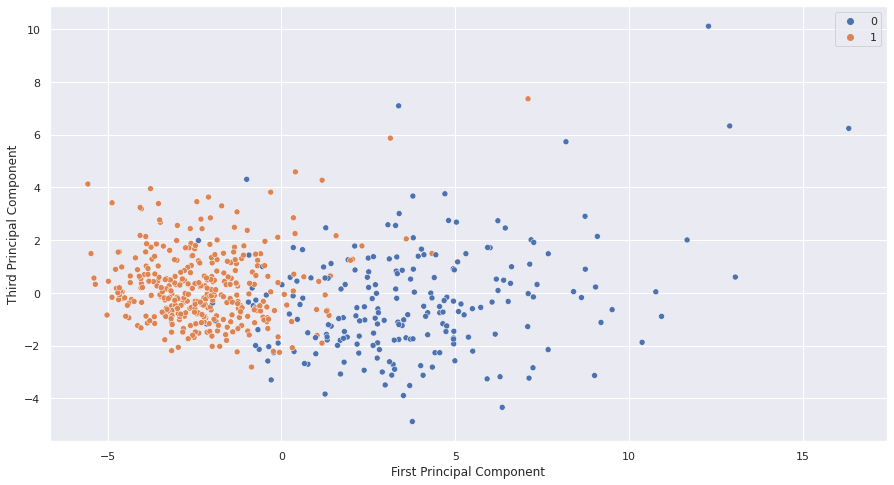

In [62]:
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x_pca[:,0], x_pca[:,2],hue=breast_cancer.target)
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.show()

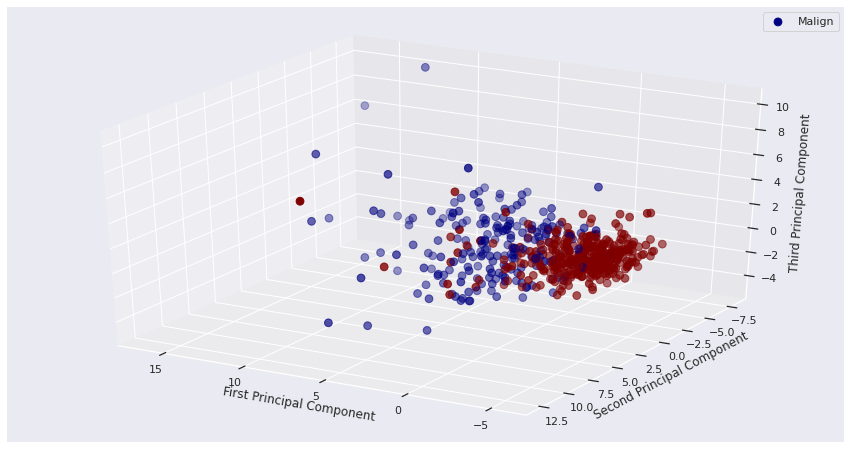

In [63]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=breast_cancer.target, cmap='jet', s=60)
ax.legend(['Malign'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)

In [64]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163]


In [65]:
print(pca.singular_values_)

[86.93235745 56.90677266 40.04263937]


In [66]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.0597061 , -0.21518136, -0.23107671,  0.18611301,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997969, -0.08945723, -0.15229263,  0.20443046,
         0.2327159 ,  0.19720727,  0.13032157,  0.18384799,  0.28009202,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359318,  0.09796411, -0.00825723,  0.14188335,  0.27533947],
       [-0.00853129,  0.06454975, -0.00931427,  0.02869947, -0.10429216,
        -0.07409158,  0.00273373, -0.02556354, -0

In [67]:
pca.n_features_

30

In [68]:
pca.mean_

array([-3.16286735e-15, -6.53060890e-15, -7.07889127e-16, -8.79983452e-16,
        6.13217737e-15, -1.12036918e-15, -4.42138027e-16,  9.73249991e-16,
       -1.97167024e-15, -1.45363120e-15, -9.07641468e-16, -8.85349205e-16,
        1.77367396e-15, -8.29155139e-16, -7.54180940e-16, -3.92187747e-16,
        7.91789988e-16, -2.73946068e-16, -3.10823423e-16, -3.36676596e-16,
       -2.33322442e-15,  1.76367415e-15, -1.19802625e-15,  5.04966114e-16,
       -5.21317026e-15, -2.17478837e-15,  6.85645643e-16, -1.41265636e-16,
       -2.28956670e-15,  2.57517109e-15])

In [69]:
df = pd.DataFrame(pca.components_ , columns=breast_cancer.feature_names)

Text(201.5, 0.5, 'Principal Components')

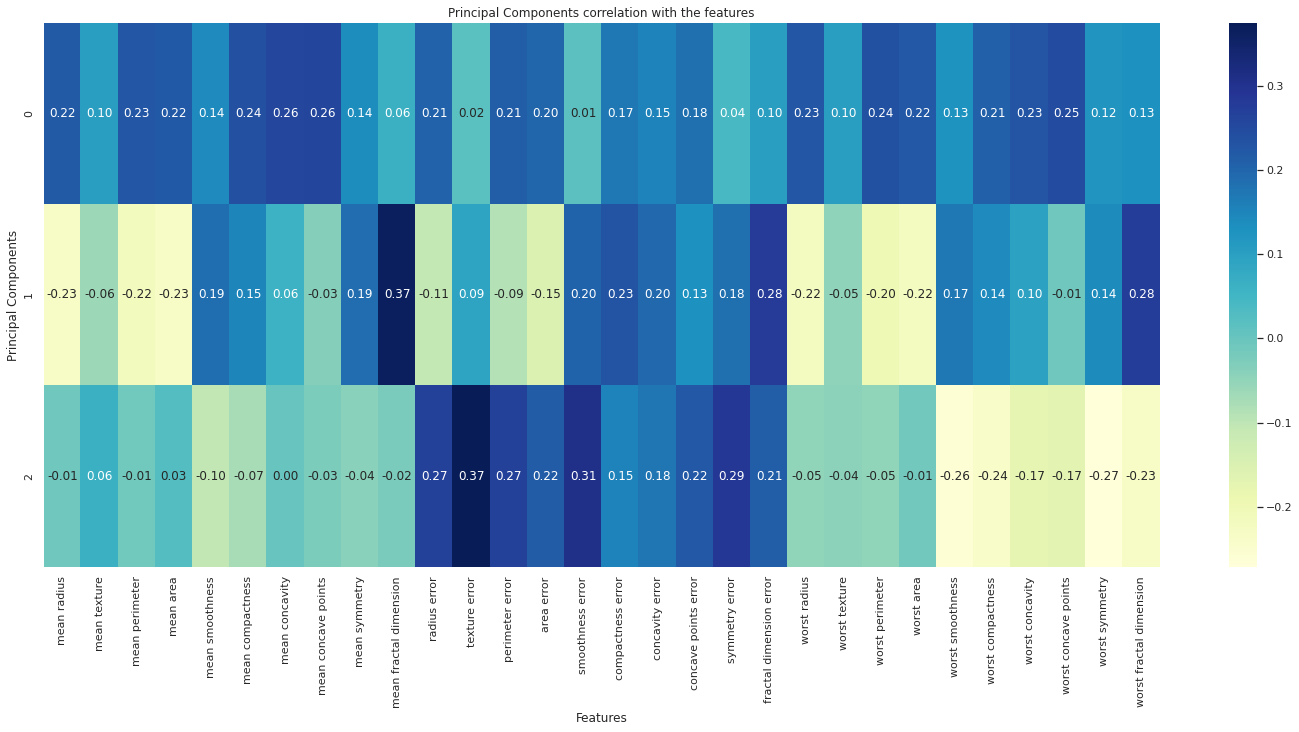

In [70]:
fig = plt.figure(figsize=(25, 10))
sns.heatmap(df,cmap='YlGnBu',annot=True,fmt=".2f")
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')